In [2]:
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [3]:
# 1) 데이터셋 생성
#   - 훈련/검증/시험 셋 생성
#   - 데이터 형식 변환
(xTrain, yTrain), (xTest, yTest)=mnist.load_data()

In [4]:
xTrain=xTrain.reshape(60000, 28*28).astype('float32')/255.0

In [5]:
xTrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
xTest=xTest.reshape(10000, 28*28).astype('float32')/255.0

In [7]:
yTrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
yTrain=np_utils.to_categorical(yTrain)
yTest=np_utils.to_categorical(yTest)

In [9]:
# 2) 모델(신경망/깊은 신경망) 구성
#   - Sequential 클래스 이용하여 레이어 추가하여 구성
#   - 복잡한 모델의 경우에는 함수 API 사용
model=Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu')) # add함수 : 레이어 추가
model.add(Dense(units=10, activation='softmax'))

In [10]:
# 3) 학습과정 설정
#   - cost함수 정의, 최적화 방법 정의(compile 함수)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
# 4) 모델 학습
#   - 훈련 -> 모델 학습(fit 함수)
hist=model.fit(xTrain, yTrain, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 2s 835us/step - loss: 0.6626 - accuracy: 0.8331
Epoch 2/5
1875/1875 [==============================] - 2s 823us/step - loss: 0.3434 - accuracy: 0.9041
Epoch 3/5
1875/1875 [==============================] - 2s 822us/step - loss: 0.2982 - accuracy: 0.9150
Epoch 4/5
1875/1875 [==============================] - 2s 817us/step - loss: 0.2703 - accuracy: 0.9229
Epoch 5/5
1875/1875 [==============================] - 2s 822us/step - loss: 0.2488 - accuracy: 0.9299


In [12]:
print(hist.history['loss'])

[0.6625903844833374, 0.3433692455291748, 0.29822906851768494, 0.27034375071525574, 0.24880553781986237]


In [13]:
print(hist.history['accuracy'])

[0.8330833315849304, 0.9040833115577698, 0.9150166511535645, 0.9228833317756653, 0.9299166798591614]


In [14]:
# 6) 모델 평가
#   - 테스트 데이터로 평가 (evaluate 함수)
res=model.evaluate(xTest, yTest, batch_size=32)
print("모델 평가 결과 : ",res)

313/313 [==============================] - 0s 636us/step - loss: 0.2308 - accuracy: 0.9328
모델 평가 결과 :  [0.23077449202537537, 0.9327999949455261]


In [15]:
# 7) 모델 사용
#   - 임의의 입력 데이터 -> 모델 -> 예측된 출력값 (predict 함수)
yhat=model.predict(xTest[0:1])
print("예측 결과 : ", yhat)

예측 결과 :  [[1.7903170e-04 6.4285018e-08 6.7846669e-04 2.3549001e-03 1.3896554e-06
  1.0945188e-04 5.1147307e-08 9.9619555e-01 1.7808379e-05 4.6325734e-04]]


In [17]:
import numpy as np

In [18]:
x=np.array([1,2,3,4,5,6,7,8,9])
y=np.array([11,20,31,47,52,69,74,89,100])

In [19]:
from keras import optimizers
sgd=optimizers.SGD(lr=0.01)

In [21]:
model=Sequential()
model.add(Dense(units=1, input_dim=1, activation='linear'))
model.compile(loss='mse', optimizer=sgd, metrics=['mse'])

In [23]:
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 997us/step - loss: 5.6818 - mse: 5.6818
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 5.6749 - mse: 5.6749
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 5.6680 - mse: 5.6680
Epoch 4/100
1/1 [==============================] - 0s 999us/step - loss: 5.6612 - mse: 5.6612
Epoch 5/100
1/1 [==============================] - 0s 1000us/step - loss: 5.6545 - mse: 5.6545
Epoch 6/100
1/1 [==============================] - 0s 998us/step - loss: 5.6478 - mse: 5.6478
Epoch 7/100
1/1 [==============================] - 0s 999us/step - loss: 5.6411 - mse: 5.6411
Epoch 8/100
1/1 [==============================] - 0s 999us/step - loss: 5.6346 - mse: 5.6346
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 5.6280 - mse: 5.6280
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 5.6215 - mse: 5.6215
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - 

1/1 [==============================] - 0s 2ms/step - loss: 5.2501 - mse: 5.2501
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 5.2468 - mse: 5.2468
Epoch 90/100
1/1 [==============================] - 0s 2ms/step - loss: 5.2434 - mse: 5.2434
Epoch 91/100
1/1 [==============================] - 0s 999us/step - loss: 5.2401 - mse: 5.2401
Epoch 92/100
1/1 [==============================] - 0s 2ms/step - loss: 5.2368 - mse: 5.2368
Epoch 93/100
1/1 [==============================] - 0s 2ms/step - loss: 5.2335 - mse: 5.2335
Epoch 94/100
1/1 [==============================] - 0s 999us/step - loss: 5.2303 - mse: 5.2303
Epoch 95/100
1/1 [==============================] - 0s 0s/step - loss: 5.2270 - mse: 5.2270
Epoch 96/100
1/1 [==============================] - 0s 998us/step - loss: 5.2238 - mse: 5.2238
Epoch 97/100
1/1 [==============================] - 0s 2ms/step - loss: 5.2207 - mse: 5.2207
Epoch 98/100
1/1 [==============================] - 0s 999us/step - loss: 5.21

In [25]:
model.predict([9.5, 7.2])

array([[104.42643],
       [ 79.18971]], dtype=float32)

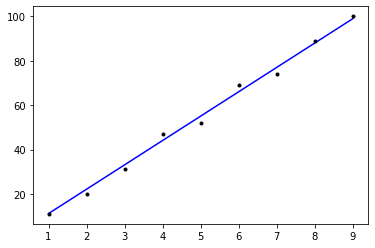

In [27]:
import matplotlib.pyplot as plt
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

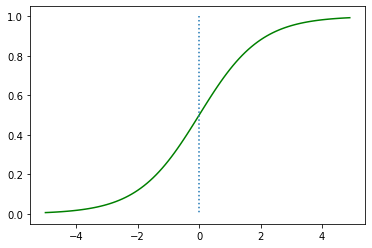

In [29]:
def mySigmoid(x):
    return 1/(1+np.exp(-x))
    
x=np.arange(-5, 5, 0.1)
y=mySigmoid(x)
plt.plot(x,y,'g')
plt.plot([0,0],[1,0],":")

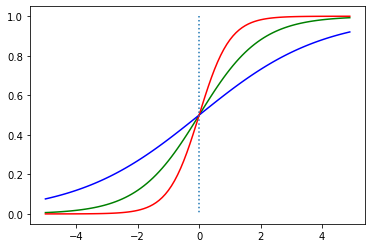

In [30]:
def mySigmoid2(z):
    return 1/(1+np.exp(-z))
    
x=np.arange(-5, 5, 0.1)
y1=mySigmoid2(x)
y2=mySigmoid2(0.5*x)
y3=mySigmoid2(2*x)
plt.plot(x,y1,'g')
plt.plot(x,y2,'b')
plt.plot(x,y3,'r')
plt.plot([0,0],[1,0],":")

In [31]:
x=np.array([-50,-40,-30,-20,-10,-5,0,5,10,22,31,47,55])
y=np.array([0,0,0,0,0,0,0,1,1,1,1,1,1])

In [32]:
model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

In [33]:
sgd=optimizers.SGD(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['binary_accuracy'])

In [34]:
model.fit(x, y, batch_size=1, epochs=300)

Epoch 1/300
13/13 [==============================] - 0s 692us/step - loss: 0.1230 - binary_accuracy: 1.0000
Epoch 2/300
13/13 [==============================] - 0s 615us/step - loss: 0.1050 - binary_accuracy: 1.0000
Epoch 3/300
13/13 [==============================] - 0s 615us/step - loss: 0.0950 - binary_accuracy: 1.0000
Epoch 4/300
13/13 [==============================] - 0s 615us/step - loss: 0.0883 - binary_accuracy: 1.0000
Epoch 5/300
13/13 [==============================] - 0s 615us/step - loss: 0.0836 - binary_accuracy: 1.0000
Epoch 6/300
13/13 [==============================] - 0s 1ms/step - loss: 0.0799 - binary_accuracy: 1.0000
Epoch 7/300
13/13 [==============================] - 0s 692us/step - loss: 0.0771 - binary_accuracy: 1.0000
Epoch 8/300
13/13 [==============================] - 0s 616us/step - loss: 0.0748 - binary_accuracy: 1.0000
Epoch 9/300
13/13 [==============================] - 0s 538us/step - loss: 0.0728 - binary_accuracy: 1.0000
Epoch 10/300
13/13 [==========

13/13 [==============================] - 0s 692us/step - loss: 0.0453 - binary_accuracy: 1.0000
Epoch 77/300
13/13 [==============================] - 0s 538us/step - loss: 0.0451 - binary_accuracy: 1.0000
Epoch 78/300
13/13 [==============================] - 0s 538us/step - loss: 0.0450 - binary_accuracy: 1.0000
Epoch 79/300
13/13 [==============================] - 0s 846us/step - loss: 0.0448 - binary_accuracy: 1.0000
Epoch 80/300
13/13 [==============================] - 0s 615us/step - loss: 0.0446 - binary_accuracy: 1.0000
Epoch 81/300
13/13 [==============================] - 0s 462us/step - loss: 0.0445 - binary_accuracy: 1.0000
Epoch 82/300
13/13 [==============================] - 0s 615us/step - loss: 0.0443 - binary_accuracy: 1.0000
Epoch 83/300
13/13 [==============================] - 0s 462us/step - loss: 0.0441 - binary_accuracy: 1.0000
Epoch 84/300
13/13 [==============================] - 0s 461us/step - loss: 0.0440 - binary_accuracy: 1.0000
Epoch 85/300
13/13 [============

13/13 [==============================] - 0s 923us/step - loss: 0.0356 - binary_accuracy: 1.0000
Epoch 151/300
13/13 [==============================] - 0s 538us/step - loss: 0.0355 - binary_accuracy: 1.0000
Epoch 152/300
13/13 [==============================] - 0s 462us/step - loss: 0.0354 - binary_accuracy: 1.0000
Epoch 153/300
13/13 [==============================] - 0s 538us/step - loss: 0.0353 - binary_accuracy: 1.0000
Epoch 154/300
13/13 [==============================] - 0s 847us/step - loss: 0.0352 - binary_accuracy: 1.0000
Epoch 155/300
13/13 [==============================] - 0s 692us/step - loss: 0.0351 - binary_accuracy: 1.0000
Epoch 156/300
13/13 [==============================] - 0s 538us/step - loss: 0.0350 - binary_accuracy: 1.0000
Epoch 157/300
13/13 [==============================] - 0s 692us/step - loss: 0.0349 - binary_accuracy: 1.0000
Epoch 158/300
13/13 [==============================] - 0s 538us/step - loss: 0.0348 - binary_accuracy: 1.0000
Epoch 159/300
13/13 [===

13/13 [==============================] - 0s 539us/step - loss: 0.0292 - binary_accuracy: 1.0000
Epoch 225/300
13/13 [==============================] - 0s 692us/step - loss: 0.0292 - binary_accuracy: 1.0000
Epoch 226/300
13/13 [==============================] - 0s 538us/step - loss: 0.0291 - binary_accuracy: 1.0000
Epoch 227/300
13/13 [==============================] - 0s 461us/step - loss: 0.0290 - binary_accuracy: 1.0000
Epoch 228/300
13/13 [==============================] - 0s 615us/step - loss: 0.0290 - binary_accuracy: 1.0000
Epoch 229/300
13/13 [==============================] - 0s 462us/step - loss: 0.0289 - binary_accuracy: 1.0000
Epoch 230/300
13/13 [==============================] - 0s 615us/step - loss: 0.0288 - binary_accuracy: 1.0000
Epoch 231/300
13/13 [==============================] - 0s 692us/step - loss: 0.0287 - binary_accuracy: 1.0000
Epoch 232/300
13/13 [==============================] - 0s 1ms/step - loss: 0.0287 - binary_accuracy: 1.0000
Epoch 233/300
13/13 [=====

13/13 [==============================] - 0s 1ms/step - loss: 0.0247 - binary_accuracy: 1.0000
Epoch 299/300
13/13 [==============================] - 0s 692us/step - loss: 0.0246 - binary_accuracy: 1.0000
Epoch 300/300
13/13 [==============================] - 0s 615us/step - loss: 0.0246 - binary_accuracy: 1.0000


array([[0.50149435],
       [0.89141506],
       [0.9591024 ]], dtype=float32)

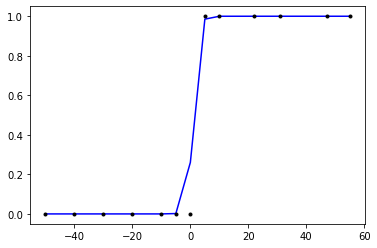

In [38]:
plt.plot(x, model.predict(x), 'b', x,y,'k.')
model.predict([1,3,4])